[View in Colaboratory](https://colab.research.google.com/github/marcosfelt/che435_hw7/blob/master/CH437_Quiz5.ipynb)

Constants

In [0]:
from math import pi, exp
import matplotlib.pyplot as plt
import numpy as np
v_fundamental = 214.36 # cm^-1
rot_const = 0.0373 #cm^-1
hcDe = 1.5422 #eV
k = 1.38064852e-23 #m2 kg s-2 K-1
h = 6.626e-34 #Js
c = 2.998e10 #cm/s
R = 8.3144598 #L kPa K−1 mol−1 or J/mol/K
P = 100 #kPa
conversion_to_kg = 1.66e-27

Calculate the partition functions of the reactants and products.

In [0]:
def translational_partition(mass_amu, T, n):
  mass = mass_amu*conversion_to_kg
  qT = n*R*T/P*(2*pi*mass*k*T)**1.5/h**3
  return qT

def rotational_partition(T, sigma):
  theta_R = h*c*rot_const/k
  qR = T/(sigma*theta_R)
  return qR
  
def vibrational_partition(T):
  theta_v = h*c*v_fundamental/k
  qV = 1/(1-np.exp(-theta_v/T))
  return qV

deltaE = hcDe*1.60218e-19

Calculate K using the partition functions.

K at 1000K = 5.6086337157027044e+41


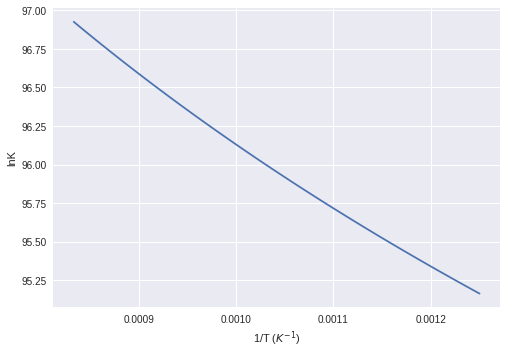

In [27]:
def equilibrium_constant(T):
    #For I2
    qI2 = translational_partition(2*126.90447, T, 1)*rotational_partition(T, 2)*vibrational_partition(T)
    #I
    qI = translational_partition(126.90447, T, 1)*rotational_partition(T, 1)*vibrational_partition(T)*4*np.exp(-h*c*v_fundamental)
    #Calculate K
    K = qI**2/qI2*np.exp(deltaE/R/T)
    return K

  
#Calculate K over 800 K to 1200K
T = np.linspace(800, 1200, 50)
inverseT = 1/T
K = equilibrium_constant(T)
lnK = np.log(K)

plt.plot(inverseT,lnK)
plt.xlabel('1/T ($K^{-1}$)')
plt.ylabel('lnK')

#K at 1000K

K_1000 = equilibrium_constant(1000)
print('K at 1000K = ' + str(K_1000))
